In [1]:
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt

# Approximating discrete rvs with continuous rvs

## Poisson

### Generating random numbers

In [2]:
# Parameters for the Poisson distribution
mu_h = 6
working_hours = 10
mu_d = mu_h * working_hours

# Generating 1000s random values from a Poisson distribution
n = 1000
xs = stats.poisson.rvs(mu_d, size = 1000)

# Parameters for the Normal distribution
mu_norm = mu_d
sigma_norm = math.sqrt(mu_d)

# Generating 1000s random values from a Normal distribution
norms = stats.norm.rvs(loc = mu_norm, scale = sigma_norm, size = n)

### Plottting

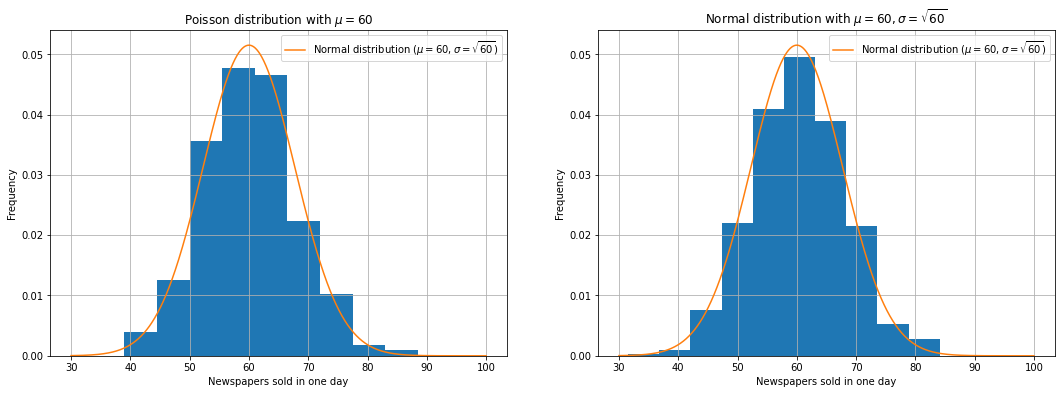

In [3]:
# Instantiate canvas
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# Style canvas
ax[0].set_title("Poisson distribution with $\mu = 60$")
ax[1].set_title("Normal distribution with $\mu = 60, \sigma = \sqrt{60}$")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

ax[0].set_xlabel("Newspapers sold in one day")
ax[1].set_xlabel("Newspapers sold in one day")

ax[0].grid()
ax[1].grid()

# Plot histogram
ax[0].hist(xs, bins = 10, density = True)
ax[1].hist(norms, bins = 10, density = True)

# Overlap a normal distribution
x = np.linspace(30, 100, 1000)
y = stats.norm.pdf(x, loc = mu_norm, scale = sigma_norm)
ax[0].plot(x, y, label = "Normal distribution ($\mu = 60, \sigma = \sqrt{60}$)")
ax[1].plot(x, y, label = "Normal distribution ($\mu = 60, \sigma = \sqrt{60}$)")

ax[0].legend()
ax[1].legend()

output = None

# CLT

### Generating random numbers

In [7]:
# Parameters for the population
population_size = 1000
mu = 10
sigma = 2

# Generating the values of the population
population_values = stats.norm.rvs(loc = mu, scale = sigma, size = population_size)

# Sampling 1000 times samples of size n, where n = 10, 15, 30, 50, 100, from the population and computing the mean
simulations = 100
ns = [10, 30, 75, 100]

# sample_means is a matrix with n rows and m columns, where
# m : 
sample_means = np.zeros(shape = (len(ns), simulations)) 

for i in range(len(ns)):
    for j in range(simulations):
        sample = np.random.choice(population_values, size = ns[i])
        sample_means[i, j] = np.mean(sample)

### Plotting

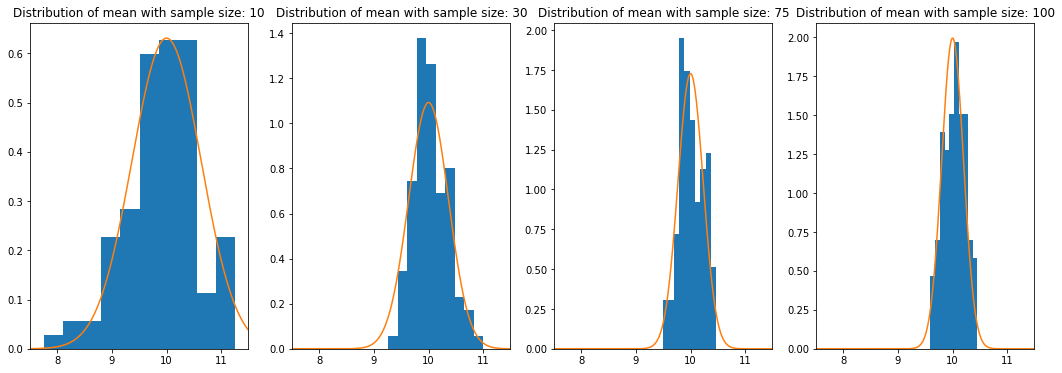

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = len(ns), figsize = (18, 6))

for i in range(len(ns)):
    ax[i].hist(sample_means[i, :], density = True)
    ax[i].set_xlim([7.5, 11.5])
    # Overlap a normal distribution
    x = np.linspace(5, 15, 1000)
    y = stats.norm.pdf(x, loc = mu, scale = (sigma / math.sqrt(ns[i])))
    ax[i].plot(x, y)
    ax[i].set_title(f"Distribution of mean with sample size: {ns[i]}")